<a href="https://colab.research.google.com/github/bengy124/Drug-Discovery-Project/blob/main/BioINF_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


In [ ]:
target = new_client.target
target_query = target.search('CHEMBL5419')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P06935', 'xref_name': None, 'xre...",West Nile virus,Genome polyprotein,17.0,False,CHEMBL5419,"[{'accession': 'P06935', 'component_descriptio...",SINGLE PROTEIN,11082


In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL5419'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
df=pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2375987,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,231.0
1,None,2375989,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,25684.0
2,None,2375991,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,297.0
3,None,2375993,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,11565.0
4,None,2375995,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,None,23312950,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,6.6
228,None,23312951,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,3.5
229,None,23312952,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,5.7
230,None,23312953,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,3.7


*Filtered by IC50 to show results only for drugs that can elict 50% inhibition of the target protein.*

We want to pay attention to the "value" column as this tells us the potency of the drug. The lower the number the more potent the drug.

In [ ]:
df.to_csv('bioactivity_data.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!mkdir "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data’: File exists


In [ ]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

In [ ]:
!ls -l "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

total 1091
-rw------- 1 root root 138655 Oct 28 07:24 bioactivity_data.csv
-rw------- 1 root root 576050 Oct 23 01:26 bioactivity_preprocessed_data.csv
-rw------- 1 root root 401875 Oct 28 06:53 results.zip


In [ ]:
!head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,2375987,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,,,BAO_0000190,BAO_0000357,single protein format,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CCCCN)NC(=O)c1ccc2ccccc2c1,,,CHEMBL1140065,J. Med. Chem.,2008,"{'bei': '11.67', 'le': '0.22', 'lle': '6.01', 'sei': '3.04'}",CHEMBL521985,,CHEMBL521

*Saving to Google Drive*

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2375987,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,231.0
1,None,2375989,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,25684.0
2,None,2375991,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,297.0
3,None,2375993,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,11565.0
4,None,2375995,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,None,23312950,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,6.6
228,None,23312951,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,3.5
229,None,23312952,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,5.7
230,None,23312953,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,3.7


In [ ]:
df2_1 = df2.drop_duplicates(['canonical_smiles'])
df2_1

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2375987,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,231.0
1,None,2375989,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,25684.0
2,None,2375991,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,297.0
3,None,2375993,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,11565.0
4,None,2375995,[],CHEMBL980962,Inhibition of WNV recombinant NS2B-NS3 protease,B,None,None,BAO_0000190,BAO_0000357,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,nM,UO_0000065,None,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,None,23312950,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,6.6
228,None,23312951,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,3.5
229,None,23312952,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,5.7
230,None,23312953,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844504,Inhibition of West Nile virus NS2B (49 to 96 r...,B,None,None,BAO_0000190,BAO_0000019,...,West Nile virus,Genome polyprotein,11082,None,None,IC50,uM,UO_0000065,None,3.7


*Dropping any missing values from the "value" column*

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_1[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,231.0
1,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,25684.0
2,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,297.0
3,CHEMBL468253,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...,11565.0
4,CHEMBL459944,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...,73.0
...,...,...,...
227,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,6600.0
228,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,3500.0
229,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,5700.0
230,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,3700.0


In [ ]:
df3.to_csv('new_bioacivity_preprocessed.csv', index = False)

In [ ]:
df3_1 = pd.read_csv('new_bioacivity_preprocessed.csv')

In [ ]:
bioactivity_class = []
for i in df3_1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4=pd.concat([df3_1,pd.Series(bioactivity_class)], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,231.0,active
1,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,25684.0,inactive
2,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,297.0,active
3,CHEMBL468253,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...,11565.0,inactive
4,CHEMBL459944,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...,73.0,active
...,...,...,...,...
166,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,6600.0,intermediate
167,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,3500.0,intermediate
168,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,5700.0,intermediate
169,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,3700.0,intermediate


In [ ]:
df4.to_csv('bioactivity_data.csv', index=False)

In [ ]:
! ls -l

total 549640
-rw-r--r-- 1 root root    18446 Oct 28 07:24 bioactivity_data.csv
-rw-r--r-- 1 root root   199280 Oct 28 06:53 bioactivity_data_pIC50_1.csv
-rw-r--r-- 1 root root   149115 Oct 28 06:53 bioactivity_data_pIC50_2.csv
-rw-r--r-- 1 root root  4934618 Oct 28 07:12 bioactivity_data_pIC50.csv
-rw-r--r-- 1 root root  2482551 Oct 28 07:12 descriptors_output.csv
drwx------ 5 root root     4096 Oct 28 07:24 gdrive
drwxr-xr-x 3 root root     4096 Oct 28 07:06 __MACOSX
-rw-r--r-- 1 root root      125 Oct 28 06:53 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      134 Oct 28 06:53 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      131 Oct 28 06:53 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      127 Oct 28 06:53 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x8

In [ ]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

In [ ]:
! ls "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv  results.zip


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-28 07:24:43--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.5’

Miniconda3-py37_4.8 100%[===================>]  81.12M   112MB/s    in 0.7s    

2022-10-28 07:24:44 (112 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.5’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - 

In [ ]:
df5 = pd.read_csv('bioactivity_data.csv')

In [ ]:
df_nosmiles = df5.drop(columns='canonical_smiles')

smiles = []
for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd,key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')



In [ ]:
df_cleaned_smiles = pd.concat([df_nosmiles,smiles],axis=1)
df_cleaned_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL521985,231.0,active,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...
1,CHEMBL468885,25684.0,inactive,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...
2,CHEMBL468674,297.0,active,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...
3,CHEMBL468253,11565.0,inactive,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...
4,CHEMBL459944,73.0,active,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...
...,...,...,...,...
166,CHEMBL4867842,6600.0,intermediate,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...
167,CHEMBL4871785,3500.0,intermediate,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1
168,CHEMBL4862793,5700.0,intermediate,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1
169,CHEMBL4865004,3700.0,intermediate,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski=lipinski(df_cleaned_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,568.723,0.62797,8.0,7.0
1,562.715,1.86440,6.0,6.0
2,574.731,-1.07196,10.0,7.0
3,561.688,-1.27683,9.0,7.0
4,518.663,-0.98643,8.0,7.0
...,...,...,...,...
166,425.532,5.35660,3.0,3.0
167,323.400,2.28740,4.0,3.0
168,323.396,3.15730,3.0,3.0
169,389.455,4.41730,3.0,4.0


In [ ]:
df_combined=pd.concat([df5,df_lipinski],axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,231.0,active,568.723,0.62797,8.0,7.0
1,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,25684.0,inactive,562.715,1.86440,6.0,6.0
2,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,297.0,active,574.731,-1.07196,10.0,7.0
3,CHEMBL468253,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...,11565.0,inactive,561.688,-1.27683,9.0,7.0
4,CHEMBL459944,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...,73.0,active,518.663,-0.98643,8.0,7.0
...,...,...,...,...,...,...,...,...
166,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,6600.0,intermediate,425.532,5.35660,3.0,3.0
167,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,3500.0,intermediate,323.400,2.28740,4.0,3.0
168,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,5700.0,intermediate,323.396,3.15730,3.0,3.0
169,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,3700.0,intermediate,389.455,4.41730,3.0,4.0


In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) 
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x


In [ ]:
df_combined.standard_value.describe()

count       171.000000
mean      15593.748538
std       23014.579207
min          32.000000
25%        1371.500000
50%        5700.000000
75%       20000.000000
max      100000.000000
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm=norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,active,568.723,0.62797,8.0,7.0,231.0
1,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,inactive,562.715,1.86440,6.0,6.0,25684.0
2,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,active,574.731,-1.07196,10.0,7.0,297.0
3,CHEMBL468253,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...,inactive,561.688,-1.27683,9.0,7.0,11565.0
4,CHEMBL459944,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...,active,518.663,-0.98643,8.0,7.0,73.0
...,...,...,...,...,...,...,...,...
166,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,intermediate,425.532,5.35660,3.0,3.0,6600.0
167,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,intermediate,323.400,2.28740,4.0,3.0,3500.0
168,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,intermediate,323.396,3.15730,3.0,3.0,5700.0
169,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,intermediate,389.455,4.41730,3.0,4.0,3700.0


In [ ]:
df_norm.standard_value_norm.describe()

count       171.000000
mean      15593.748538
std       23014.579207
min          32.000000
25%        1371.500000
50%        5700.000000
75%       20000.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final=pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,active,568.723,0.62797,8.0,7.0,6.636388
1,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,inactive,562.715,1.86440,6.0,6.0,4.590337
2,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,active,574.731,-1.07196,10.0,7.0,6.527244
3,CHEMBL468253,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...,inactive,561.688,-1.27683,9.0,7.0,4.936854
4,CHEMBL459944,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...,active,518.663,-0.98643,8.0,7.0,7.136677
...,...,...,...,...,...,...,...,...
166,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,intermediate,425.532,5.35660,3.0,3.0,5.180456
167,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,intermediate,323.400,2.28740,4.0,3.0,5.455932
168,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,intermediate,323.396,3.15730,3.0,3.0,5.244125
169,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,intermediate,389.455,4.41730,3.0,4.0,5.431798


In [ ]:
df_final.pIC50.describe()

count    171.000000
mean       5.332030
std        0.801289
min        4.000000
25%        4.698970
50%        5.244125
75%        5.862844
max        7.494850
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('bioactivity_data_pIC50_1.csv')

In [ ]:
df_2class=df_final[df_final.bioactivity_class !='intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL521985,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[...,active,568.723,0.62797,8.0,7.0,6.636388
1,CHEMBL468885,NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)...,inactive,562.715,1.86440,6.0,6.0,4.590337
2,CHEMBL468674,N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1cc...,active,574.731,-1.07196,10.0,7.0,6.527244
3,CHEMBL468253,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC...,inactive,561.688,-1.27683,9.0,7.0,4.936854
4,CHEMBL459944,N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C...,active,518.663,-0.98643,8.0,7.0,7.136677
...,...,...,...,...,...,...,...,...
161,CHEMBL4861658,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3cn[nH]c3)ccc12,inactive,323.400,2.28740,4.0,3.0,4.376751
162,CHEMBL4868018,O=C(NCC1CCNCC1)c1cc2cc(-c3ccc(N4CCCCC4)cc3)ccc...,inactive,416.569,4.55460,3.0,3.0,4.508638
163,CHEMBL4855636,Cc1cc(C#N)ccc1-c1ccc2[nH]c(C(=O)NCC3CCNCC3)cc2c1,inactive,372.472,3.74440,3.0,3.0,4.301030
164,CHEMBL4869765,COc1ccc(-c2ccc3cc(C(=O)NCC4CCNCC4)[nH]c3c2)cc1,inactive,363.461,3.57290,3.0,3.0,4.696804


In [ ]:
df_2class.to_csv('bioactivity_data_pIC50_2.csv')

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


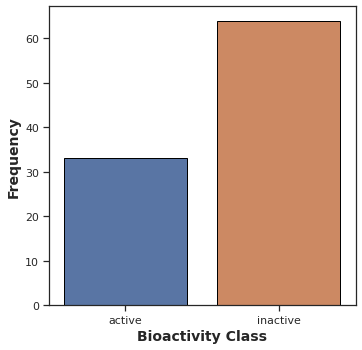

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


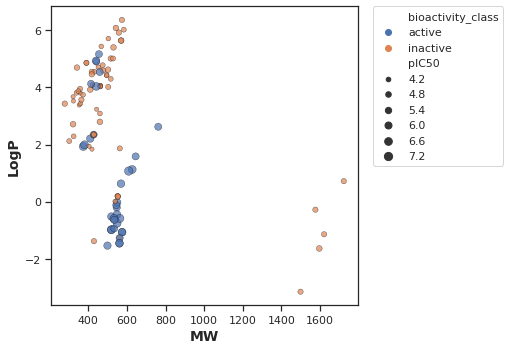

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

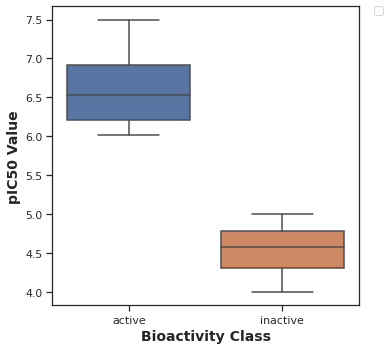

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='pIC50',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(1)

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)

  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2112.0,8.958775e-16,0.05,Different distribution (reject H0)


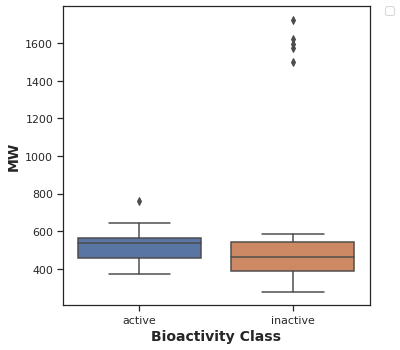

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='MW',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_MW.pdf')

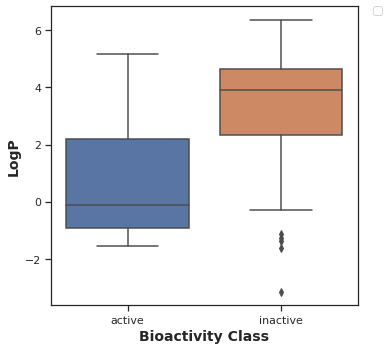

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='LogP',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,484.5,0.000014,0.05,Different distribution (reject H0)


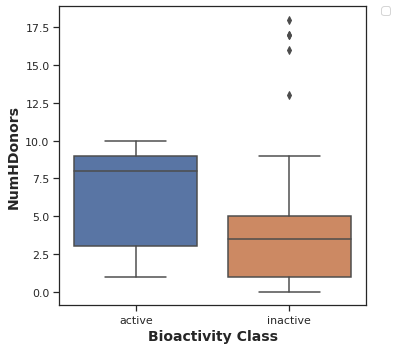

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHDonors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1487.0,0.000934,0.05,Different distribution (reject H0)


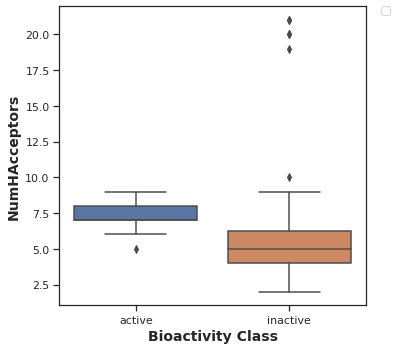

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHAcceptors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1625.5,0.000012,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

updating: bioactivity_data_pIC50_1.csv (deflated 77%)
updating: plot_bioactivity_class.pdf (deflated 37%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: plot_ic50.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: bioactivity_data_pIC50_2.csv (deflated 75%)
updating: plot_MW.pdf (deflated 38%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_MW_vs_LogP.pdf (deflated 16%)
updating: bioactivity_data.csv (deflated 84%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: plot_LogP.pdf (deflated 38%)
updating: new_bioacivity_preprocessed.csv (deflated 83%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: descriptors_output.csv (deflated 96%)
updating: bioactivity_data_pIC50.csv (deflated 96%)


In [ ]:
!cp results.zip "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-10-28 07:25:25--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-10-28 07:25:25--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.5’

padel.zip.5         100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-10-28 07:25:26 (169 MB/s) - ‘padel.zip.5’ saved [25768637/25768637]

--2022-10-28 07:25:26--  https://gi

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config 

In [ ]:
df_reg=pd.read_csv('bioactivity_data_pIC50_1.csv')
selection = ['canonical_smiles','molecule_chembl_id']
df_reg_selection = df_reg[selection]
df_reg_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False)

In [ ]:
! cat molecule.smi | head -5

! cat molecule.smi | wc -l

N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CCCCN)NC(=O)c1ccc2ccccc2c1	CHEMBL521985
NCCCC[C@H](NC(=O)Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C=O)Cc1c[nH]c2ccccc12	CHEMBL468885
N=C(N)NCCCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)Cc1ccccc1)C(=O)N[C@H](C=O)CCCNC(=N)N	CHEMBL468674
N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCNC(N)=O)NC(=O)[C@H](CCCCN)NC(=O)Cc1ccccc1	CHEMBL468253
N=C(N)NCCC[C@@H](C=O)NC(=O)[C@H](CCCN)NC(=O)[C@H](CCCCN)NC(=O)Cc1ccccc1	CHEMBL459944
171


In [ ]:
! bash padel.sh

Processing CHEMBL521985 in molecule.smi (1/171). 
Processing CHEMBL468885 in molecule.smi (2/171). 
Processing CHEMBL468674 in molecule.smi (3/171). Average speed: 5.56 s/mol.
Processing CHEMBL468253 in molecule.smi (4/171). Average speed: 2.92 s/mol.
Processing CHEMBL459944 in molecule.smi (5/171). Average speed: 2.31 s/mol.
Processing CHEMBL467624 in molecule.smi (7/171). Average speed: 1.63 s/mol.
Processing CHEMBL468049 in molecule.smi (6/171). Average speed: 1.79 s/mol.
Processing CHEMBL511741 in molecule.smi (8/171). Average speed: 1.75 s/mol.
Processing CHEMBL460359 in molecule.smi (9/171). Average speed: 1.38 s/mol.
Processing CHEMBL494922 in molecule.smi (11/171). Average speed: 1.18 s/mol.
Processing CHEMBL494923 in molecule.smi (10/171). Average speed: 1.24 s/mol.
Processing CHEMBL522831 in molecule.smi (12/171). Average speed: 1.20 s/mol.
Processing CHEMBL522523 in molecule.smi (13/171). Average speed: 1.03 s/mol.
Processing CHEMBL494301 in molecule.smi (14/171). Average sp

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
167,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
168,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
169,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_Y = df_reg['pIC50']
df_Y

0      6.636388
1      4.590337
2      6.527244
3      4.936854
4      7.136677
         ...   
166    5.180456
167    5.455932
168    5.244125
169    5.431798
170    5.065502
Name: pIC50, Length: 171, dtype: float64

In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.636388
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.590337
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.527244
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.936854
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.136677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.180456
167,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.455932
168,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.244125
169,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.431798


In [ ]:
dataset.to_csv('bioactivity_data_pIC50.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
167,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
168,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
169,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.pIC50
Y

0      6.636388
1      4.590337
2      6.527244
3      4.936854
4      7.136677
         ...   
166    5.180456
167    5.455932
168    5.244125
169    5.431798
170    5.065502
Name: pIC50, Length: 171, dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection2 = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection2.fit_transform(X)
X.shape

(171, 140)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((136, 140), (136,))

In [ ]:
X_test.shape, Y_test.shape

((35, 140), (35,))

In [ ]:
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)
r2=model.score(X_test,Y_test)
r2

0.5904066013081426

In [ ]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

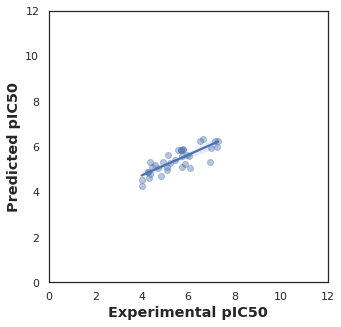

In [ ]:
sns.set (color_codes=True)
sns.set_style("white")
ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show